In [1]:
#!pip install --user logomaker

In [5]:
from Bio import SeqIO
import logomaker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import softmax
from scipy.stats import entropy
import seaborn as sns
from io import StringIO

In [7]:
nucleotides = ["A", "C", "G", "T"]

In [6]:
#coordinates = "Chr5:3564493-3565087"
#coordinates = "Chr5:552887-553012"
coordinates = "Chr5:3500000-3600000"
start = int(coordinates.split(":")[1].split("-")[0])
end = int(coordinates.split(":")[1].split("-")[1])

df = pd.read_parquet(f"logits_{coordinates}.parquet")
genome = SeqIO.to_dict(SeqIO.parse("../../data/mlm/tair10.fa", "fasta"))
df["ref_nuc"] = df.apply(lambda row: genome[row.chromosome][row.pos], axis=1)
df.set_index("pos", inplace=True, drop=False)
df

,pos,chromosome,A,C,G,T,ref_nuc
pos,,,,,,,
3500000,3500000,Chr5,0.261700,-0.510872,0.399737,0.259875,A
3500001,3500001,Chr5,0.980765,-0.262463,0.481138,-0.705114,C
3500002,3500002,Chr5,0.554887,-0.531758,-0.234655,0.614921,A
3500003,3500003,Chr5,0.152100,-0.349591,0.674923,-0.029989,G
3500004,3500004,Chr5,0.409633,0.238507,-0.419348,0.230997,C
...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.256520,-0.629005,0.378055,0.439862,C
3599996,3599996,Chr5,0.351747,-0.415634,0.503562,0.018792,G
3599997,3599997,Chr5,-0.105351,0.421414,-0.115145,0.253361,T


In [8]:
for nucleotide in nucleotides:
    df[f"llr_{nucleotide}"] = df.apply(lambda row: row[nucleotide]-row[row.ref_nuc], axis=1)
df

,pos,chromosome,A,C,G,T,ref_nuc,llr_A,llr_C,llr_G,llr_T
pos,,,,,,,,,,,
3500000,3500000,Chr5,0.261700,-0.510872,0.399737,0.259875,A,0.000000,-0.772572,0.138037,-0.001825
3500001,3500001,Chr5,0.980765,-0.262463,0.481138,-0.705114,C,1.243228,0.000000,0.743601,-0.442651
3500002,3500002,Chr5,0.554887,-0.531758,-0.234655,0.614921,A,0.000000,-1.086645,-0.789542,0.060034
3500003,3500003,Chr5,0.152100,-0.349591,0.674923,-0.029989,G,-0.522823,-1.024514,0.000000,-0.704911
3500004,3500004,Chr5,0.409633,0.238507,-0.419348,0.230997,C,0.171126,0.000000,-0.657854,-0.007510
...,...,...,...,...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.256520,-0.629005,0.378055,0.439862,C,0.885525,0.000000,1.007060,1.068868
3599996,3599996,Chr5,0.351747,-0.415634,0.503562,0.018792,G,-0.151814,-0.919196,0.000000,-0.484769
3599997,3599997,Chr5,-0.105351,0.421414,-0.115145,0.253361,T,-0.358712,0.168053,-0.368506,0.000000


In [9]:
df.loc[:, nucleotides] = softmax(df[nucleotides].values, axis=1)
df

,pos,chromosome,A,C,G,T,ref_nuc,llr_A,llr_C,llr_G,llr_T
pos,,,,,,,,,,,
3500000,3500000,Chr5,0.277160,0.127999,0.318185,0.276655,A,0.000000,-0.772572,0.138037,-0.001825
3500001,3500001,Chr5,0.480656,0.138646,0.291641,0.089057,C,1.243228,0.000000,0.743601,-0.442651
3500002,3500002,Chr5,0.350475,0.118231,0.159134,0.372160,A,0.000000,-1.086645,-0.789542,0.060034
3500003,3500003,Chr5,0.242376,0.146760,0.408836,0.202027,G,-0.522823,-1.024514,0.000000,-0.704911
3500004,3500004,Chr5,0.320963,0.270481,0.140099,0.268457,C,0.171126,0.000000,-0.657854,-0.007510
...,...,...,...,...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.267169,0.110206,0.301695,0.320930,C,0.885525,0.000000,1.007060,1.068868
3599996,3599996,Chr5,0.298956,0.138783,0.347968,0.214292,G,-0.151814,-0.919196,0.000000,-0.484769
3599997,3599997,Chr5,0.195496,0.331063,0.193591,0.279850,T,-0.358712,0.168053,-0.368506,0.000000


In [10]:
for nucleotide in nucleotides:
    df[f"ref_1hot_{nucleotide}"] = df.apply(lambda row: 1.0 if row.ref_nuc==nucleotide else 0.0, axis=1)
df

,pos,chromosome,A,C,G,T,ref_nuc,llr_A,llr_C,llr_G,llr_T,ref_1hot_A,ref_1hot_C,ref_1hot_G,ref_1hot_T
pos,,,,,,,,,,,,,,,
3500000,3500000,Chr5,0.277160,0.127999,0.318185,0.276655,A,0.000000,-0.772572,0.138037,-0.001825,1.0,0.0,0.0,0.0
3500001,3500001,Chr5,0.480656,0.138646,0.291641,0.089057,C,1.243228,0.000000,0.743601,-0.442651,0.0,1.0,0.0,0.0
3500002,3500002,Chr5,0.350475,0.118231,0.159134,0.372160,A,0.000000,-1.086645,-0.789542,0.060034,1.0,0.0,0.0,0.0
3500003,3500003,Chr5,0.242376,0.146760,0.408836,0.202027,G,-0.522823,-1.024514,0.000000,-0.704911,0.0,0.0,1.0,0.0
3500004,3500004,Chr5,0.320963,0.270481,0.140099,0.268457,C,0.171126,0.000000,-0.657854,-0.007510,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.267169,0.110206,0.301695,0.320930,C,0.885525,0.000000,1.007060,1.068868,0.0,1.0,0.0,0.0
3599996,3599996,Chr5,0.298956,0.138783,0.347968,0.214292,G,-0.151814,-0.919196,0.000000,-0.484769,0.0,0.0,1.0,0.0
3599997,3599997,Chr5,0.195496,0.331063,0.193591,0.279850,T,-0.358712,0.168053,-0.368506,0.000000,0.0,0.0,0.0,1.0


In [14]:
def entropy(p):
    return -np.sum(p*np.log2(p), axis=1)


def cross_entropy(p, q):
    return -np.sum(p*np.log2(q), axis=1)

In [15]:
true_cols = [f"ref_1hot_{nucleotide}" for nucleotide in nucleotides]
pred_cols = nucleotides
df["cross_entropy"] = cross_entropy(df[true_cols].values, df[pred_cols].values)
df["entropy"] = entropy(df[pred_cols].values)
df

,pos,chromosome,A,C,G,T,ref_nuc,llr_A,llr_C,llr_G,llr_T,ref_1hot_A,ref_1hot_C,ref_1hot_G,ref_1hot_T,cross_entropy,entropy
pos,,,,,,,,,,,,,,,,,
3500000,3500000,Chr5,0.277160,0.127999,0.318185,0.276655,A,0.000000,-0.772572,0.138037,-0.001825,1.0,0.0,0.0,0.0,1.851207,1.931236
3500001,3500001,Chr5,0.480656,0.138646,0.291641,0.089057,C,1.243228,0.000000,0.743601,-0.442651,0.0,1.0,0.0,0.0,2.850522,1.732421
3500002,3500002,Chr5,0.350475,0.118231,0.159134,0.372160,A,0.000000,-1.086645,-0.789542,0.060034,1.0,0.0,0.0,0.0,1.512617,1.847000
3500003,3500003,Chr5,0.242376,0.146760,0.408836,0.202027,G,-0.522823,-1.024514,0.000000,-0.704911,0.0,0.0,1.0,0.0,1.290405,1.895600
3500004,3500004,Chr5,0.320963,0.270481,0.140099,0.268457,C,0.171126,0.000000,-0.657854,-0.007510,0.0,1.0,0.0,0.0,1.886402,1.943035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.267169,0.110206,0.301695,0.320930,C,0.885525,0.000000,1.007060,1.068868,0.0,1.0,0.0,0.0,3.181719,1.907183
3599996,3599996,Chr5,0.298956,0.138783,0.347968,0.214292,G,-0.151814,-0.919196,0.000000,-0.484769,0.0,0.0,1.0,0.0,1.522973,1.922365
3599997,3599997,Chr5,0.195496,0.331063,0.193591,0.279850,T,-0.358712,0.168053,-0.368506,0.000000,0.0,0.0,0.0,1.0,1.837274,1.961101


In [16]:
df["cross_perplexity"] = np.exp2(df.cross_entropy)
df["perplexity"] = np.exp2(df.entropy)

<AxesSubplot:ylabel='perplexity'>

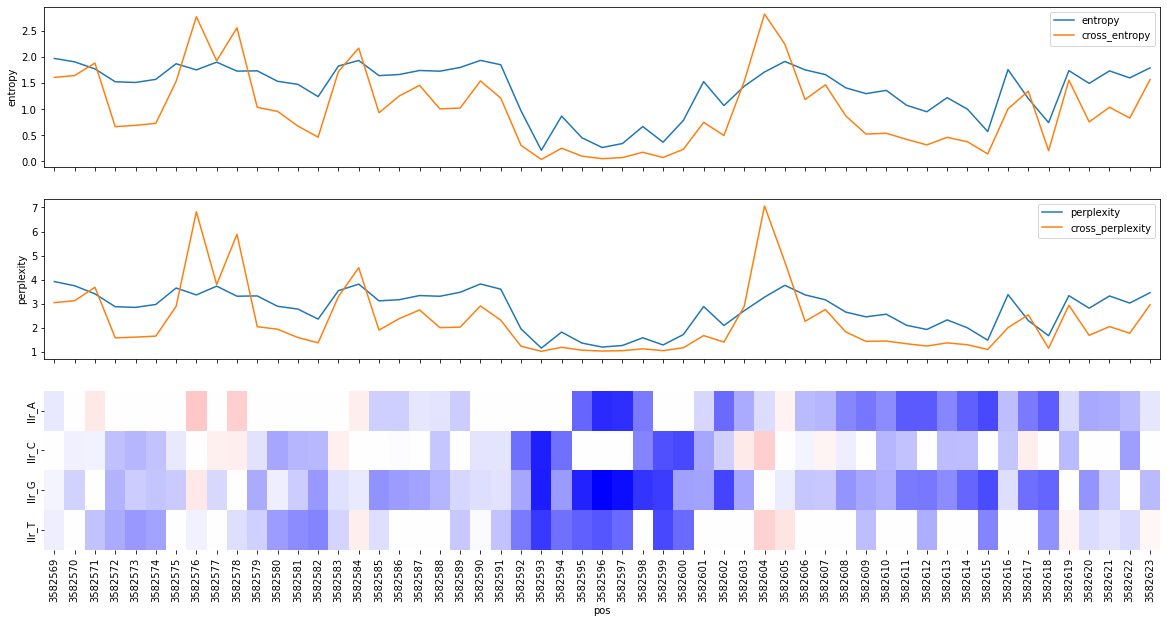

In [24]:
min_pos = 3582589 - 20
max_pos = 3582603 + 20

#plt.figure(figsize=(40, 5))

fig, axes = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(20, 10))



g = sns.heatmap(
    data=df.loc[min_pos:max_pos, [f"llr_{nucleotide}" for nucleotide in nucleotides]].T,
    #square=True,
    cbar=False,
    cbar_kws={"orientation": "vertical", "shrink": .05, "label": "LLR"},
    center=0,
    cmap="bwr",
    #annot=annot,
    #fmt = ''
    ax=axes[2]
)

sns.lineplot(data=df.loc[min_pos:max_pos], y="entropy", x=g.get_xticks(), ax=axes[0], label="entropy")
sns.lineplot(data=df.loc[min_pos:max_pos], y="perplexity", x=g.get_xticks(), ax=axes[1], label="perplexity")
sns.lineplot(data=df.loc[min_pos:max_pos], y="cross_entropy", x=g.get_xticks(), ax=axes[0], label="cross_entropy")
sns.lineplot(data=df.loc[min_pos:max_pos], y="cross_perplexity", x=g.get_xticks(), ax=axes[1], label="cross_perplexity")


#df.loc[min_pos:max_pos].plot(x="pos", y="perplexity", ax=axes[0])
# doesn't work because sns heatmap has a different actual xtick range.

Text(0, 0.5, 'information (bits)')

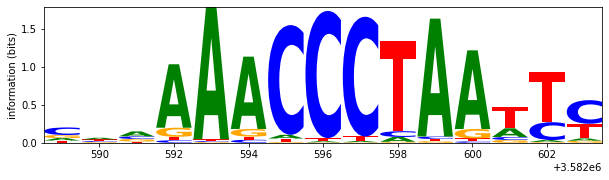

In [36]:
logomaker.Logo(
    logomaker.transform_matrix(df.loc[min_pos:max_pos, nucleotides], from_type="probability", to_type="information"),
)
plt.ylabel("information (bits)")

In [31]:
# http://planttfdb.gao-lab.org/tf.php?sp=Ath&did=AT1G72740.1
# http://planttfdb.gao-lab.org/motif/Ath/AT1G72740.meme
string = """
0.213058	  0.529210	  0.079038	  0.178694
0.237113	  0.546392	  0.116838	  0.099656
0.202749	  0.158076	  0.175258	  0.463918
0.735395	  0.010309	  0.075601	  0.178694
0.969072	  0.010309	  0.006873	  0.013746
0.969072	  0.000000	  0.030928	  0.000000
0.034364	  0.965636	  0.000000	  0.000000
0.000000	  1.000000	  0.000000	  0.000000
0.000000	  1.000000	  0.000000	  0.000000
0.000000	  0.000000	  0.000000	  1.000000
0.993127	  0.000000	  0.003436	  0.003436
0.831615	  0.000000	  0.168385	  0.000000
0.474227	  0.140893	  0.006873	  0.378007
0.030928	  0.443299	  0.054983	  0.470790
0.127148	  0.539519	  0.092784	  0.240550
"""
string

'\n0.213058\t  0.529210\t  0.079038\t  0.178694\n0.237113\t  0.546392\t  0.116838\t  0.099656\n0.202749\t  0.158076\t  0.175258\t  0.463918\n0.735395\t  0.010309\t  0.075601\t  0.178694\n0.969072\t  0.010309\t  0.006873\t  0.013746\n0.969072\t  0.000000\t  0.030928\t  0.000000\n0.034364\t  0.965636\t  0.000000\t  0.000000\n0.000000\t  1.000000\t  0.000000\t  0.000000\n0.000000\t  1.000000\t  0.000000\t  0.000000\n0.000000\t  0.000000\t  0.000000\t  1.000000\n0.993127\t  0.000000\t  0.003436\t  0.003436\n0.831615\t  0.000000\t  0.168385\t  0.000000\n0.474227\t  0.140893\t  0.006873\t  0.378007\n0.030928\t  0.443299\t  0.054983\t  0.470790\n0.127148\t  0.539519\t  0.092784\t  0.240550\n'

In [33]:
true_motif = pd.read_csv(StringIO(string), sep="\t", header=None, names=["A", "C", "G", "T"])
true_motif

,A,C,G,T
0,0.213058,0.529210,0.079038,0.178694
1,0.237113,0.546392,0.116838,0.099656
2,0.202749,0.158076,0.175258,0.463918
3,0.735395,0.010309,0.075601,0.178694
4,0.969072,0.010309,0.006873,0.013746
5,0.969072,0.000000,0.030928,0.000000
6,0.034364,0.965636,0.000000,0.000000
7,0.000000,1.000000,0.000000,0.000000
8,0.000000,1.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,1.000000


Text(0, 0.5, 'information (bits)')

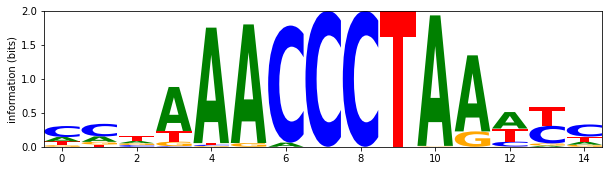

In [35]:
logomaker.Logo(
    logomaker.transform_matrix(true_motif, from_type="probability", to_type="information"),
)
plt.ylabel("information (bits)")

In [47]:
with open(f'wig_perplexity_{coordinates}.txt', 'a') as file:
    file.write(f'fixedStep  chrom=Chr5 start={start+1}  step=1\n')  # check Chr vs. chr
    df.to_csv(file, columns=["perplexity"], header=False, index=False)

In [48]:
!head wig*

fixedStep  chrom=Chr5 start=3500001  step=1
3.6080182634160574
7.212613414699377
2.8532721019041967
2.4459678935679694
3.697120494332242
1.8633079633266865
3.867195624206221
1.6823798226034428
6.682676612531764


In [53]:
!ls wig*

wigToBigWig  wig_perplexity_Chr5:3500000-3600000.txt


In [49]:
!wget http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/wigToBigWig
!chmod +x wigToBigWig

--2022-06-18 13:31:03--  http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/wigToBigWig
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9527800 (9.1M)
Saving to: 'wigToBigWig'

100%[======================================>] 9,527,800   5.19MB/s   in 1.7s   

2022-06-18 13:31:04 (5.19 MB/s) - 'wigToBigWig' saved [9527800/9527800]



In [55]:
!ls ../../data/chromatin

Snakefile     intersection.bed		plots		 windows.bed
chrom.sizes   intersection.seq.bed	processed_peaks
datasets      peaks			tair10.fa
find_urls.py  plant_reg_map_source.txt	tracks.tsv


In [56]:
!cat ../../data/chromatin/chrom.sizes

Chr1	30427671
Chr2	19698289
Chr3	23459830
Chr4	18585056
Chr5	26975502


In [57]:
!./wigToBigWig wig_perplexity_Chr5:3500000-3600000.txt ../../data/chromatin/chrom.sizes wig_perplexity_Chr5:3500000-3600000.bw

In [59]:
!ls -sh | grep -i wig

9.1M wigToBigWig
476K wig_perplexity_Chr5:3500000-3600000.bw
1.8M wig_perplexity_Chr5:3500000-3600000.txt
